In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Creare un notebook chiamato BikeStores che carichi in un dataframe le informazioni presenti nel foglio 'products' del file excel presente al link
df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true","products")
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


1. visualizzare il numero di prodotti di cui non si conosce l'anno del modello

In [ ]:
df["model_year"].isnull().count()
#isnull guarda i valori nulli

311

2. eliminare i prodotti del punto precedente dal dataframe

In [ ]:
df.dropna(inplace = True)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


3. contare i prodotti che sono stati presenteti (model_year) nel 2017

In [ ]:
df.loc[df["model_year"]== 2017.0,["product_id"]].count()

product_id    85
dtype: int64

4. visualizzare i prodotti che hanno un category_id compreso tra 2 e 4 (estemi inclusi)

In [ ]:
df.loc[(df["category_id"] >= 2) & (df["category_id"] <= 4)]

,product_id,product_name,brand_id,category_id,model_year,list_price
9,10,Surly Straggler - 2016,8,4,2016.0,1549.00
10,11,Surly Straggler 650b - 2016,8,4,2016.0,1680.99
11,12,Electra Townie Original 21D - 2016,1,3,2016.0,549.99
12,13,Electra Cruiser 1 (24-Inch) - 2016,1,3,2016.0,269.99
13,14,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1,3,2016.0,269.99
...,...,...,...,...,...,...
309,310,Electra Townie Commute 27D Ladies - 2018,1,2,2018.0,899.99
311,312,Electra Townie Commute 8D Ladies' - 2018,1,2,2018.0,699.99
312,313,Electra Townie Original 1 Ladies' - 2018,1,2,2018.0,449.99
313,314,Electra Townie Original 21D EQ Ladies' - 2018,1,2,2018.0,679.99


5. visualizzare i prodotti che hanno la parola Trek nel nome

In [ ]:
df[df["product_name"].str.contains("Trek")]

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99
28,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


6. visualizzare il numero di prodotti per ogni categoria (visualizzare il numero della categoria e il numero di prodotti)

In [ ]:
df.groupby("category_id")["product_id"].count()

category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_id, dtype: int64

7. visualizzare le categorie che hanno più di 50 prodotti visualizzare il numero della categoria e il numero di prodotti)

In [ ]:
df1 = df.groupby("category_id",as_index = False)["product_id"].count()
df1.loc[df1["product_id"]> 50]

,category_id,product_id
0,1,57
2,3,76
5,6,59
6,7,59


8, visualizzare uno stacked bar chart che riporti il numero di prodotti presentati per ogni anno in ogni categoria. Il grafico deve presentare sulle ascisse il numero della categoria e sulle ordinate il numero di prodotti, divisi per anno

<BarContainer object of 311 artists>

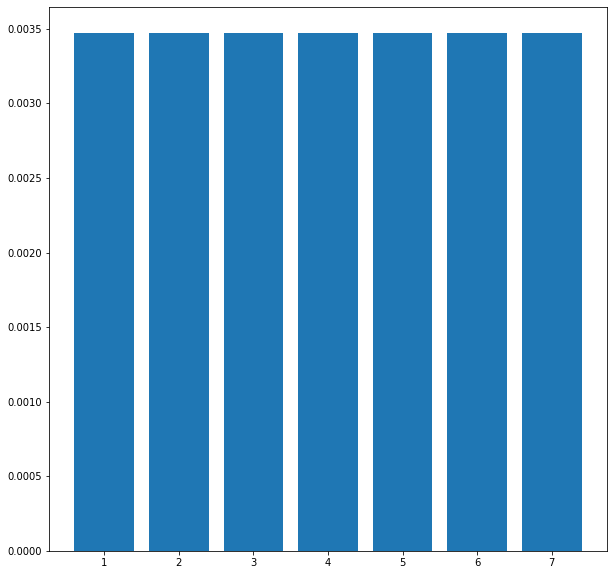

In [ ]:
df2 = df.groupby(["model_year","category_id"]).count()
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.bar(df["category_id"], df1["product_id"].count() /df["model_year"])  


9. visualizzare un pie chart che riporti in numero di prodotti presentati in ogni anno.

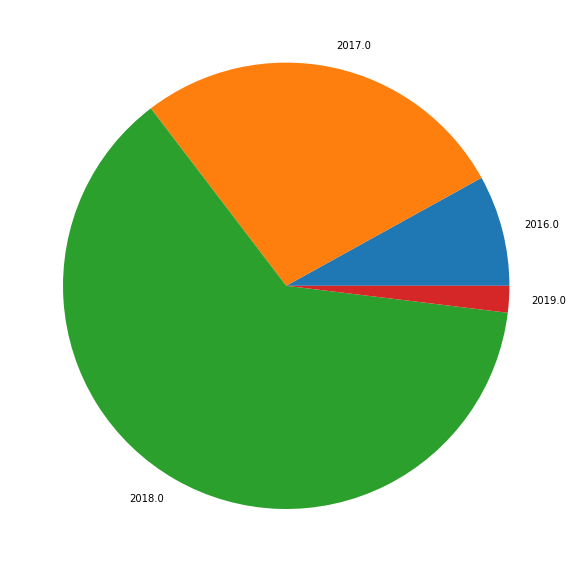

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_id, dtype: int64

In [ ]:
df2 = df.groupby("model_year")["product_id"].count()
fig = plt.figure(figsize=(10,20))
ax = plt.axes()
ax.pie(df2.values,labels = df2.index, autopct="")
plt.show()


10. salvare in un file png i due grafici affiancati